<a href="https://colab.research.google.com/github/NAXE22/NAXE22.github.io/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns



loading MNIST dataset for training and testing the model

In [7]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)






11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualise the dataset

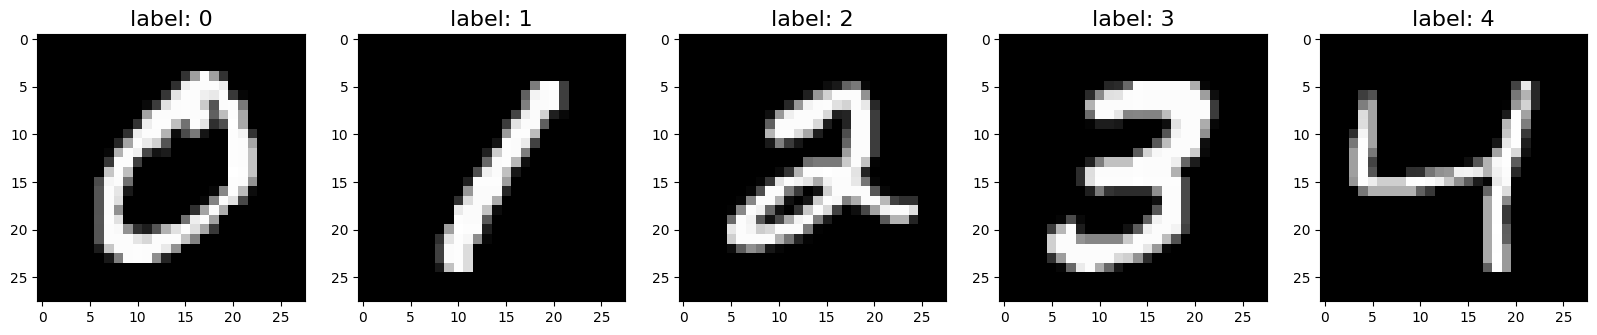

In [8]:
number_of_images=5
figure, axis=plt.subplots(1,number_of_images,figsize=(20,20))
for i in range(0,number_of_images):
  sample=x_train[y_train==i][0]
  axis[i].imshow(sample,cmap='gray')
  axis[i].set_title("label: {}".format(i),fontsize=16)


preparation of data:normalisation of MNIST dataset, reshaping data

In [9]:
x_train,x_test=x_train/255.0,x_test/255.0
#x_train=x_train.reshape(x_train.shape[0],-1)
#x_test=x_test.reshape(x_test.shape[0],-1)

defining and creating the model. we are using functional API

In [10]:
from tensorflow.keras import layers
inputs = tf.keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)  # Flatten the input image
x = layers.Dense(128, activation='relu')(x)  #  ReLU activation
x = layers.Dropout(0.2)(x)  # Dropout layer
outputs = layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

compiling the model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train the model using training dataset

In [12]:
model.fit(x_train, y_train, epochs=10)
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("test loss:{},test accuracy{}".format(test_loss,test_accuracy))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8528 - loss: 0.4955
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9533 - loss: 0.1523
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9670 - loss: 0.1121
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9740 - loss: 0.0865
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0735
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9807 - loss: 0.0633
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9810 - loss: 0.0583
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9831 - loss: 0.0519
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9843 - loss: 0.0488
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0445
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9749 - loss: 0.0906
test loss:0.07443755120038986,test accur

evaluation of model

In [13]:
y_pred= model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[6.85919507e-12 1.54894257e-11 4.86752683e-08 ... 9.99990404e-01
  3.83047066e-10 6.99231748e-07]
 [8.10020140e-09 1.65383938e-06 9.99997318e-01 ... 1.80670142e-18
  1.34340938e-08 5.23349762e-23]
 [4.60424454e-09 9.99526918e-01 6.01366082e-06 ... 4.06361156e-04
  4.91956889e-05 2.72016720e-09]
 ...
 [1.48112588e-12 3.35946786e-14 1.89858383e-13 ... 3.31768706e-06
  1.59715142e-07 2.15108048e-05]
 [1.59747035e-10 9.48808085e-16 6.98963728e-14 ... 4.95280206e-11
  3.55060001e-05 4.50014071e-12]
 [1.59515579e-09 1.36977704e-14 5.72823033e-08 ... 4.12082349e-16
  1.33497025e-09 5.76089263e-12]]
[7 2 1 ... 4 5 6]


testing with a random exmaple

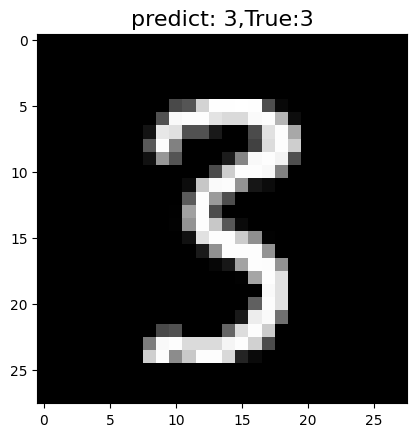

In [14]:
random_index=np.random.choice(len(x_test))
x_sample=x_test[random_index]
y_sample_true=y_test[random_index]
y_sample_pred_class=y_pred_classes[random_index]
plt.title("predict: {},True:{}".format(y_sample_pred_class,y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

confusion matrix

Text(0.5, 1.0, 'confusion matrix')

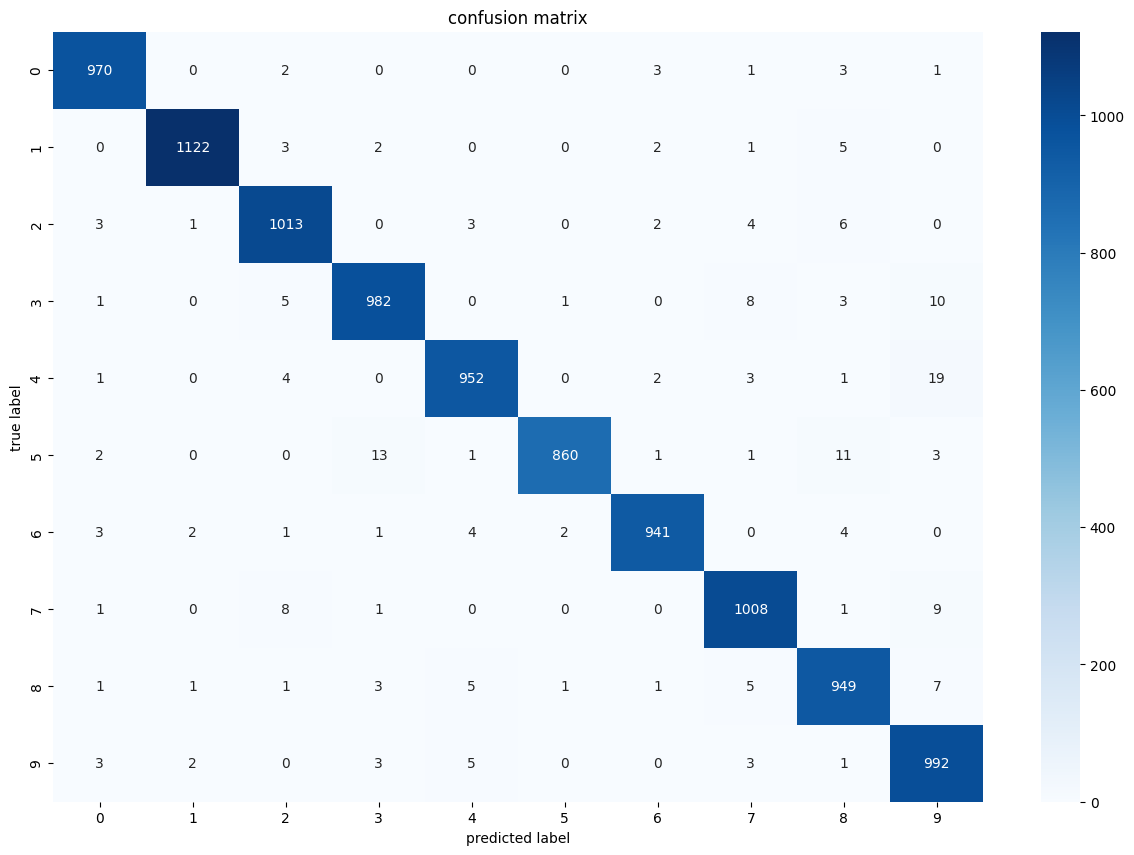

In [15]:
from sklearn.metrics import confusion_matrix
y_true=y_test
confu_mtx =confusion_matrix(y_true,y_pred_classes)
fig =plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
ax= sns.heatmap(confu_mtx,annot=True,fmt='d',ax=ax,cmap="Blues")
ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix')


investigating the errors

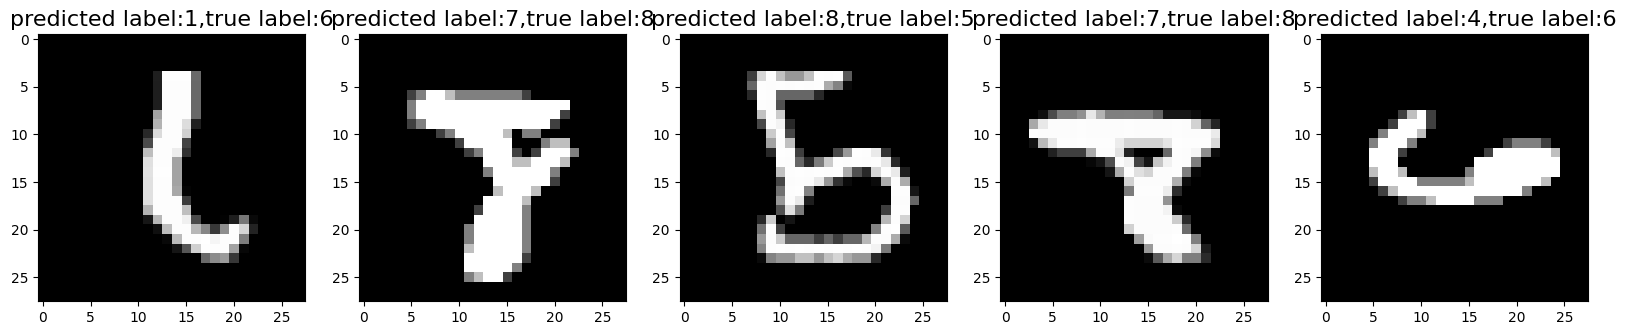

In [16]:
errors=(y_pred_classes-y_test !=0)
y_pred_classes_errors=y_pred_classes[errors]
y_pred_errors=y_pred[errors]
y_test_errors=y_test[errors]
x_test_errors=x_test[errors]
y_pred_errors_probability=np.max(y_pred_errors,axis=1)
true_probability_errors=np.diagonal(np.take(y_pred_errors,y_test_errors,axis=1))
diff_errors=y_pred_errors_probability-true_probability_errors

 #get errors sorted
sorted_index=np.argsort(diff_errors)
top_errors=sorted_index[-5:]
bottom_errors=sorted_index[:5]
num=len(top_errors)
f,ax=plt.subplots(1,num,figsize=(20,20))
for i in range(0,num):
   err=top_errors[i]
   sample=x_test_errors[err].reshape(28,28)
   y_t=y_test_errors[err]
   y_p=y_pred_classes_errors[err]
   ax[i].imshow(sample,cmap='gray')
   ax[i].set_title("predicted label:{},true label:{}".format(y_p,y_t),fontsize=16)
plt.show()

